In [9]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
session = "linear_regression_act_only"
runs = api.runs(f"tony_t_liu/{session}")


meta_data = {
    "batch_size": [],
    "act_man_width": [],
    "weight_man_width": [],
    "same_input": [],
    "act_rounding": [],
    "back_man_width": []
}

stat_data = {
    # "lr": [],
    # "test_acc": [],
    # "test_loss": [],
    "grad_norm_entire": [],
    "grad_norm_entire_ema": [],
    # "lp_grad_norm": [],
    # "full_grad_norm": [],
}

for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    for key in stat_data:
        if key in run.summary._json_dict:
            stat_data[key].append(run.summary._json_dict[key])
        else:
            stat_data[key].append(None)

    for key in meta_data:
        if key in run.config:
            meta_data[key].append(run.config[key])
        else:
            meta_data[key].append(None)

runs_df = pd.DataFrame(meta_data | stat_data)


In [10]:
# pad none id with empty string
# runs_df["same_input"].fillna(False, inplace=True)
# # runs_df[runs_df["back_man_width"] == None] = runs_df["act_man_width"]
# runs_df["back_man_width"].fillna(runs_df["act_man_width"], inplace=True)

runs_df

,batch_size,act_man_width,weight_man_width,same_input,act_rounding,back_man_width,grad_norm_entire,grad_norm_entire_ema
0,1024,23,23,False,stochastic,0,0.002578,0.009133
1,1024,23,23,False,stochastic,0,0.020354,0.014935
2,1024,23,23,False,stochastic,0,0.020366,0.015318
3,1024,23,23,False,stochastic,0,0.010661,0.011123
4,1024,23,23,False,stochastic,0,0.020206,0.011976
...,...,...,...,...,...,...,...,...
235,512,0,23,False,stochastic,0,0.013063,0.018690
236,512,0,23,False,stochastic,0,0.018492,0.020264
237,512,0,23,False,stochastic,0,0.030896,0.031485
238,512,0,23,False,stochastic,0,0.049042,0.033188


In [11]:
#runs_df = runs_df.groupby(["batch_size", "weight_man_width", "act_man_width", "method", "lr"]).mean().reset_index()
runs_df = runs_df.groupby(["batch_size", "weight_man_width", "act_man_width", "act_rounding", "back_man_width", "same_input"]).mean().reset_index()
import numpy as np
# runs_df["lr"] = runs_df["lr"].astype(np.float32)
runs_df.to_csv(f"../out/result_tables/{session}.csv")

In [12]:
runs_df

,batch_size,weight_man_width,act_man_width,act_rounding,back_man_width,same_input,grad_norm_entire,grad_norm_entire_ema
0,32,23,0,nearest,0,True,0.111782,0.109894
1,32,23,0,stochastic,0,False,0.083770,0.094592
2,32,23,0,stochastic,0,True,0.114024,0.129016
3,32,23,23,stochastic,0,False,0.068139,0.076786
4,32,23,23,stochastic,0,True,0.074361,0.077997
5,64,23,0,nearest,0,True,0.085449,0.090805
6,64,23,0,stochastic,0,False,0.082032,0.069527
7,64,23,0,stochastic,0,True,0.108112,0.116161
8,64,23,23,stochastic,0,False,0.048265,0.050051
9,64,23,23,stochastic,0,True,0.030982,0.043956


In [53]:
runs_df["lr"].unique()

KeyError: 'lr'

In [54]:
import pandas as pd
import numpy as np
import matplotlib.backends
%matplotlib inline 
import matplotlib.pyplot as plt


def make_plot(df, dir, levels=10):
    # df = df.drop(columns=["method"])
    grouped_df = df.groupby(['act_man_width', 'batch_size']).mean().reset_index()
    df_avg = grouped_df
    # Pivot the data to create a grid for the contour plot
    pivot_table = df_avg.pivot_table(index='batch_size', columns='act_man_width', values='grad_norm_entire_ema')

    # Create a meshgrid for the contour plot
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values

    print(pivot_table.shape)
    print(pivot_table)

    # Pad the surrounding of Z with the same value as the edge (pad on the beginning side)
    Z = np.pad(Z, ((1, 0), (1, 0)), mode='edge')
    print(X.shape, Y.shape, Z.shape)

    # Update meshgrid to match the padded Z
    X, Y = np.meshgrid(
        np.insert(pivot_table.columns, 0, pivot_table.columns[0] - 1), 
        np.insert(pivot_table.index, 0, pivot_table.index[0] - 1)
    )

    # Create a 2D contour plot
    plt.figure(figsize=(10, 8))
    cp = plt.contourf(X, Y, Z, levels=levels)
    plt.colorbar(cp, label='Norm')

    # Set the y-axis to log scale if needed
    # plt.yscale('log')  # Uncomment this line if the y-axis should be in log scale

    # Labeling the axes
    plt.xlabel('Mantissa Width')
    plt.ylabel('Batch Size')
    lr = df['lr'].iloc[0]
    plt.savefig(f"{dir}/{lr}.png")


In [55]:
# runs_df = pd.read_csv("../out/result_tables/c.csv")

In [56]:
make_plot(runs_df_m, "../out/result_images/mnist_cnn")


NameError: name 'runs_df_m' is not defined

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def line_plot(df, dir):
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(df['batch_size'], df['grad_norm_entire'], marker='o', linestyle='-', color='b')

    # Adding labels and title
    plt.xlabel('Batch Size')
    plt.ylabel('Average Gradient Norm')
    plt.title('Gradient Norm vs. Batch Size for Mantissa Width 1')
    plt.grid(True)

    # Optionally, set the x-axis to log scale if the batch sizes are not uniformly distributed
    # plt.xscale('log')

    # Save the plot
    lr = df['lr'].iloc[0]  # Assuming learning rate 'lr' is constant across the DataFrame
    plt.savefig(f"{dir}/gradient_norm_vs_batch_size_{lr}.png")

    # Show the plot if you are running this in an interactive environment (optional)
    plt.show()


/tmp/ipykernel_3183019/473369013.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actlow = act_df[rounding("stochastic") & back_man(i) & ~is_same_input]
/tmp/ipykernel_3183019/473369013.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actlow_nearest = act_df[rounding("nearest") & back_man(i)]
/tmp/ipykernel_3183019/473369013.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  actlow_same = act_df[rounding("stochastic") & is_same_input]


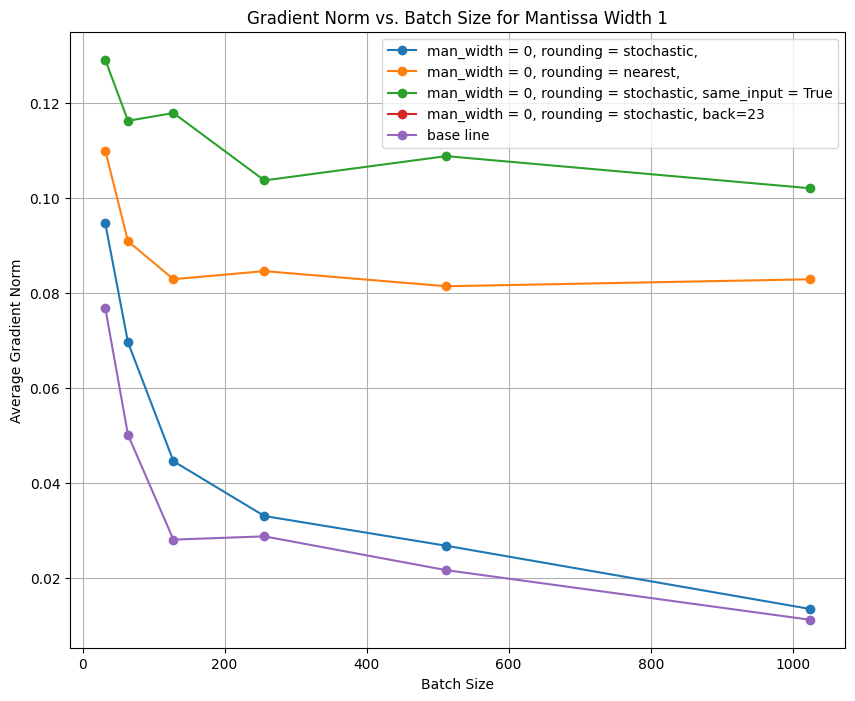

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

is_same_input = (runs_df["same_input"] == True)
def back_man(i):
    return runs_df["back_man_width"] == i
def act_man(i):
    return runs_df["act_man_width"] == i
def rounding(i):
    return runs_df["act_rounding"] == i
def weight_man(i):
    return runs_df["weight_man_width"] == i

def plot(l, label):
    plt.plot(l['batch_size'], l['grad_norm_entire_ema'], marker='o', linestyle='-', label=label)

# Loop through each man_width and plot lines for both data frames
for i in [0]:
    act_df = runs_df[act_man(i) & weight_man(23) ]
    actlow = act_df[rounding("stochastic") & back_man(i) & ~is_same_input]
    actlow_nearest = act_df[rounding("nearest") & back_man(i)]
    actlow_same = act_df[rounding("stochastic") & is_same_input]
    back_man = runs_df[rounding("stochastic") & act_man(i) & back_man(23) & ~is_same_input]
    plot(actlow, f"man_width = {i}, rounding = stochastic,")
    plot(actlow_nearest, f"man_width = {i}, rounding = nearest,")
    plot(actlow_same, f"man_width = {i}, rounding = stochastic, same_input = True")
    plot(back_man, f"man_width = {i}, rounding = stochastic, back=23")

base_line = runs_df[(runs_df["weight_man_width"] == 23) & (runs_df["act_man_width"] == 23) & (runs_df["back_man_width"] == 0) & rounding("stochastic") & ~is_same_input]
plt.plot(base_line['batch_size'], base_line['grad_norm_entire_ema'], marker='o', linestyle='-', label='base line')


# Adding labels and title
plt.xlabel('Batch Size')
plt.ylabel('Average Gradient Norm')
plt.title('Gradient Norm vs. Batch Size for Mantissa Width 1')
plt.grid(True)

# Adding the legend
plt.legend()

# Optionally, set the x-axis to log scale if the batch sizes are not uniformly distributed
# plt.xscale('log')

plt.show()
